In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import bs4 as bs
import pickle
import requests
import mpld3
mpld3.enable_notebook()
import seaborn as sns
from fbprophet import Prophet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.cross_validation import  cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

/home/harsh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/harsh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
start=dt.datetime(2010,1,1) #start date
end=dt.datetime(2017,12,31) #stop date
df_JPM=web.DataReader('JPM','yahoo',start,end)
df_JPM.head()

In [5]:
df_JPM=web.DataReader('JPM','yahoo',start,end)
df_NASDAQ=web.DataReader('^IXIC','yahoo',start,end)

In [6]:
df_SnP=web.DataReader('^GSPC','yahoo',start,end)

In [7]:
df_JPM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,41.619999,42.130001,41.450001,41.669998,34.338779,20143100
2010-01-04,41.790001,42.990002,41.669998,42.849998,35.353611,35460500
2010-01-05,42.790001,43.840000,42.779999,43.680000,36.038387,41208300
2010-01-06,43.450001,44.090000,43.310001,43.919998,36.236416,27729000
2010-01-07,43.790001,45.119999,43.610001,44.790001,36.954201,44864700


In [9]:
df_JPM.reset_index(inplace=True)

In [11]:
df_NASDAQ.head()
df_NASDAQ.reset_index(inplace=True)

In [13]:
df_SnP.head()
df_SnP.reset_index(inplace=True)

In [15]:
df_JPM.to_csv('JPM.csv')
df_NASDAQ.to_csv('NASDAQ.csv')
df_SnP.to_csv('SnP.csv')

In [2]:
df_JPM=pd.read_csv('JPM1.csv')
df_NASDAQ=pd.read_csv('NASDAQ.csv')
df_SnP=pd.read_csv('SnP.csv')

In [4]:
df_JPM.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,Gain,Loss,Average_Gain,Average_Loss,Relative_Strength,RSI,CMF,MFI,MACD
0,2010-01-29,39.650002,39.849998,38.799999,38.939999,32.127640,53649000,34.815667,34.007316,0.690002,0.000000,0.221429,0.571429,0.387500,27.927941,-0.542216,24.199356,0
1,2010-02-01,39.099998,39.930000,38.950001,39.630001,32.696934,37408200,34.733574,33.882518,0.919998,0.000000,0.287143,0.497143,0.577586,36.612012,-0.531398,28.376660,1
2,2010-02-02,39.799999,40.680000,39.700001,40.549999,33.455975,45968500,34.638693,33.841895,0.000000,0.259998,0.232857,0.515714,0.451524,31.106880,-0.528383,27.963170,0
3,2010-02-03,40.580002,41.099998,40.169998,40.290001,33.241459,37373300,34.498846,33.784710,0.000000,1.940003,0.201429,0.654286,0.307860,23.539243,-0.554808,23.130063,0
4,2010-02-04,39.790001,39.919998,38.349998,38.349998,31.640850,57211800,34.269068,33.580533,0.000000,0.049999,0.201429,0.585715,0.343903,25.589848,-0.586378,22.771638,0


How to calculate SMA in python?

dataframe.feature_name.rolling(time_period).mean()

In [22]:
df_JPM['SMA']=df_JPM['Adj Close'].rolling(window=20).mean()
df_JPM['EMA']=df_JPM['Adj Close'].ewm(span=20,adjust=False).mean()
df_NASDAQ['SMA']=df_NASDAQ['Adj Close'].rolling(window=20).mean()
df_SnP['SMA']=df_SnP['Adj Close'].rolling(window=20).mean()

In [34]:
df_JPM['SMA_100']=df_JPM['Adj Close'].rolling(window=100).mean()
df_NASDAQ['SMA_100']=df_NASDAQ['Adj Close'].rolling(window=100).mean()
df_SnP['SMA_100']=df_SnP['Adj Close'].rolling(window=100).mean()

In [35]:
df_JPM.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,SMA_100
2009,2017-12-22,108.199997,108.459999,106.809998,107.449997,106.893158,14573400,104.662281,96.556956
2010,2017-12-26,107.199997,107.989998,106.400002,107.019997,106.465385,7403700,105.114426,96.706751
2011,2017-12-27,106.669998,107.290001,106.669998,107.220001,106.664352,9496500,105.405908,96.847064
2012,2017-12-28,107.400002,107.839996,107.160004,107.790001,107.231400,7440600,105.607856,96.989486
2013,2017-12-29,108.089996,108.279999,106.940002,106.940002,106.385803,8925700,105.728229,97.126815


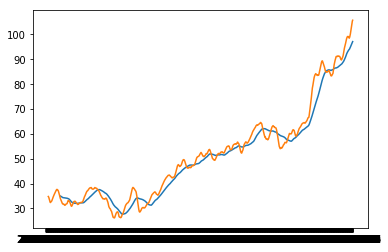

In [37]:
plt.plot(df_JPM['Date'],df_JPM['SMA_100'])
plt.plot(df_JPM['Date'],df_JPM['SMA'])

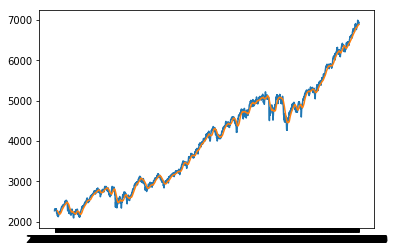

In [33]:
plt.plot(df_NASDAQ['Date'],df_NASDAQ['Adj Close'])
plt.plot(df_NASDAQ['Date'],df_NASDAQ['SMA'])

In [52]:
df_SnP.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,SMA_100,EMA
2009,2017-12-22,2684.219971,2685.350098,2678.129883,2683.340088,2683.340088,2399830000,2653.232520,2546.782319,2653.801038
2010,2017-12-26,2679.090088,2682.739990,2677.959961,2680.500000,2680.500000,1968780000,2657.186523,2548.865720,2656.343796
2011,2017-12-27,2682.100098,2685.639893,2678.909912,2682.620117,2682.620117,2202080000,2659.965527,2550.923621,2658.846303
2012,2017-12-28,2686.100098,2687.659912,2682.689941,2687.540039,2687.540039,2153330000,2663.039026,2552.989922,2661.579040
2013,2017-12-29,2689.149902,2692.120117,2673.610107,2673.610107,2673.610107,2443490000,2664.340527,2554.976824,2662.724856


In [50]:
#<dataframe>.<feature_name>.ewm(span=20, adjust=False).mean() 
#df_JPM['EMA']=df_JPM['Adj Close'].ewm(span=20,adjust=False).mean()
df_NASDAQ['EMA']=df_NASDAQ['Adj Close'].ewm(span=20,adjust=False).mean()
df_SnP['EMA']=df_SnP['Adj Close'].ewm(span=20,adjust=False).mean()

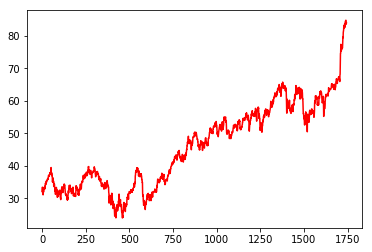

In [5]:
plt.plot(df_JPM['Adj Close'],'r')

In [25]:
yr=[]
for index,rows in df_JPM.iterrows():
    yr.append(df_JPM.iloc[index]['Date'].split('-')[0])



In [26]:
yr

['2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 

In [53]:
df_JPM.to_csv('JPM.csv')
df_NASDAQ.to_csv('NASDAQ.csv')
df_SnP.to_csv('SnP.csv')

In [50]:
df_JPM=pd.read_csv('JPM.csv')
df_NASDAQ=pd.read_csv('NASDAQ.csv')
df_SnP=pd.read_csv('SnP.csv')

In [51]:
df_JPM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 10 columns):
Date         2014 non-null object
Open         2014 non-null float64
High         2014 non-null float64
Low          2014 non-null float64
Close        2014 non-null float64
Adj Close    2014 non-null float64
Volume       2014 non-null int64
SMA          1995 non-null float64
SMA_100      1915 non-null float64
EMA          2014 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 157.4+ KB


In [17]:
df_JPM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 10 columns):
Date         2014 non-null object
Open         2014 non-null float64
High         2014 non-null float64
Low          2014 non-null float64
Close        2014 non-null float64
Adj Close    2014 non-null float64
Volume       2014 non-null int64
SMA          1995 non-null float64
SMA_100      1915 non-null float64
EMA          2014 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 157.4+ KB


In [20]:
def gains_or_loss():
    for i in df_JPM:
        print(i)
    

In [24]:
if (df_JPM['Close']-df_JPM['Open']) > 0 :
    df_JPM['Gains']=df_JPM['Close']-df_JPM['Open']


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [40]:
gains=[]
loss=[]
for index, row in df_JPM.iterrows():
    f=row['Close']-row['Open']
    if f>0:
        #df_JPM["Gains"]=f
        gains.append(f)
        loss.append(0)
    else:
        loss.append(f)
        gains.append(0)
        
df_l_g=pd.DataFrame(list(zip(gains,loss)),columns=['Gains','Loss'])
df_JPM=pd.concat([df_JPM,df_l_g],axis=1)
df_JPM['Loss']=df_JPM['Loss']*(-1)

In [41]:
len(gains)

2014

In [42]:
len(loss)

2014

In [32]:
df_l_g=pd.DataFrame(list(zip(gains,loss)),
              columns=['Gains','Loss'])

In [54]:
df_JPM.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,SMA_100,EMA
2009,2017-12-22,108.199997,108.459999,106.809998,107.449997,106.893158,14573400,104.662281,96.556956,104.457278
2010,2017-12-26,107.199997,107.989998,106.400002,107.019997,106.465385,7403700,105.114426,96.706751,104.648526
2011,2017-12-27,106.669998,107.290001,106.669998,107.220001,106.664352,9496500,105.405908,96.847064,104.840509
2012,2017-12-28,107.400002,107.839996,107.160004,107.790001,107.231400,7440600,105.607856,96.989486,105.068213
2013,2017-12-29,108.089996,108.279999,106.940002,106.940002,106.385803,8925700,105.728229,97.126815,105.193698


In [33]:
k=pd.concat([df_JPM,df_l_g])

In [34]:
k.to_csv('k.csv')

In [67]:
df_JPM['Loss']=df_JPM['Loss']*(-1)

In [58]:
df_JPM=pd.read_csv('JPM1.csv')

In [70]:
df_JPM

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,SMA_100,EMA,Gains,Loss,Average_Gain,Average_Loss
0,2009-12-31,41.619999,42.130001,41.450001,41.669998,34.338779,20143100,NaN,NaN,34.338779,0.049999,-0.000000,0.049999,0.000000
1,2010-01-04,41.790001,42.990002,41.669998,42.849998,35.353611,35460500,NaN,NaN,34.435430,1.059997,-0.000000,0.184665,0.000000
2,2010-01-05,42.790001,43.840000,42.779999,43.680000,36.038387,41208300,NaN,NaN,34.588092,0.889999,-0.000000,0.278710,0.000000
3,2010-01-06,43.450001,44.090000,43.310001,43.919998,36.236416,27729000,NaN,NaN,34.745075,0.469997,-0.000000,0.304215,0.000000
4,2010-01-07,43.790001,45.119999,43.610001,44.790001,36.954201,44864700,NaN,NaN,34.955468,1.000000,-0.000000,0.396986,0.000000
5,2010-01-08,44.369999,44.700001,44.080002,44.680000,36.863453,33110100,NaN,NaN,35.137181,0.310001,-0.000000,0.385388,0.000000
6,2010-01-11,45.119999,45.189999,44.310001,44.529999,36.739689,31878700,NaN,NaN,35.289801,0.000000,0.590000,0.334003,-0.078667
7,2010-01-12,43.990002,44.150002,42.939999,43.490002,35.881641,47109600,NaN,NaN,35.346167,0.000000,0.500000,0.289469,-0.134844
8,2010-01-13,43.549999,44.529999,42.869999,44.250000,36.508678,39622000,NaN,NaN,35.456882,0.700001,-0.000000,0.344207,-0.116865
9,2010-01-14,44.200001,44.790001,44.099998,44.689999,36.871704,37938300,NaN,NaN,35.591627,0.489998,-0.000000,0.363646,-0.101283


In [81]:
df_JPM.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,SMA_100,EMA,Gains,Loss,Average_Gain,Average_Loss,Relative_Strength
2009,2017-12-22,108.199997,108.459999,106.809998,107.449997,106.893158,14573400,104.662281,96.556956,104.457278,0.000000,0.750000,0.255715,0.479286,0.533533
2010,2017-12-26,107.199997,107.989998,106.400002,107.019997,106.465385,7403700,105.114426,96.706751,104.648526,0.000000,0.180000,0.245715,0.492143,0.499276
2011,2017-12-27,106.669998,107.290001,106.669998,107.220001,106.664352,9496500,105.405908,96.847064,104.840509,0.550003,-0.000000,0.285001,0.447857,0.636366
2012,2017-12-28,107.400002,107.839996,107.160004,107.790001,107.231400,7440600,105.607856,96.989486,105.068213,0.389999,-0.000000,0.265000,0.447857,0.591708
2013,2017-12-29,108.089996,108.279999,106.940002,106.940002,106.385803,8925700,105.728229,97.126815,105.193698,0.000000,1.149994,0.180715,0.529999,0.340972


In [78]:
df_JPM['Average_Gain']=df_JPM['Gains'].rolling(window=14).mean()
df_JPM['Average_Loss']=df_JPM['Loss'].rolling(window=14).mean()
df_JPM['Relative_Strength']=df_JPM['Average_Gain']/df_JPM['Average_Loss']
df_JPM["RSI"]=100-(100/(1-df_JPM['Relative_Strength']))

In [79]:
df_JPM['Average_Loss']=df_JPM['Loss'].rolling(window=14).mean()

In [80]:
df_JPM['Relative_Strength']=df_JPM['Average_Gain']/df_JPM['Average_Loss']

In [83]:
df_JPM["RSI"]=100-(100/(1-df_JPM['Relative_Strength']))

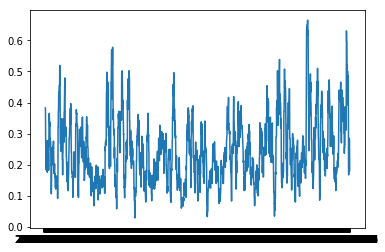

In [88]:
plt.plot(df_JPM['Date'],df_JPM["Average_Gain"])

In [86]:
df_JPM.drop(labels=['Relative_Strength'],axis=1,inplace=True)

In [87]:
df_JPM.to_csv('JPM1.csv')

In [5]:
df_JPM=pd.read_csv('JPM1.csv')

In [6]:
df_JPM.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,SMA_100,EMA
2009,2017-12-22,108.199997,108.459999,106.809998,107.449997,106.893158,14573400,104.662281,96.556956,104.457278
2010,2017-12-26,107.199997,107.989998,106.400002,107.019997,106.465385,7403700,105.114426,96.706751,104.648526
2011,2017-12-27,106.669998,107.290001,106.669998,107.220001,106.664352,9496500,105.405908,96.847064,104.840509
2012,2017-12-28,107.400002,107.839996,107.160004,107.790001,107.231400,7440600,105.607856,96.989486,105.068213
2013,2017-12-29,108.089996,108.279999,106.940002,106.940002,106.385803,8925700,105.728229,97.126815,105.193698


In [28]:
gains=[]
loss=[]
for index, row in df_JPM.iterrows():
    f=df_JPM.iloc[index+1]['Close']-df_JPM.iloc[index]['Close']
    #print(f)
    if f>0:
        gains.append(f)
        loss.append(0)
    else:
        loss.append(f)
        gains.append(0)
        

IndexError: single positional indexer is out-of-bounds

In [29]:
gains.append(0)
loss.append(0)

In [14]:
df_JPM.iloc[1]['Close']

42.849997999999999

In [30]:
gains

[1.1799999999999997,
 0.83000200000000035,
 0.23999799999999993,
 0.87000300000000408,
 0,
 0,
 0,
 0.75999799999999595,
 0.43999900000000025,
 0,
 0,
 0.12000300000000408,
 0,
 0,
 0.049998999999999683,
 0,
 0.8900030000000001,
 0.14999799999999652,
 0,
 0.69000199999999978,
 0.91999799999999965,
 0,
 0,
 0,
 0,
 0.68999799999999567,
 0.48000000000000398,
 0.15000100000000316,
 0,
 1.119999,
 0,
 0.36999899999999286,
 0,
 0.81999900000000281,
 0,
 0.96999699999999933,
 0,
 1.3300020000000075,
 0,
 0,
 0,
 0.38999900000000309,
 0.8900030000000001,
 0,
 0,
 0.51000200000000007,
 0.25,
 0,
 0,
 0.17000200000000376,
 0.54999899999999968,
 0,
 0,
 0.29000100000000373,
 0.83999999999999631,
 0.3599969999999999,
 0,
 0.080001000000002875,
 0,
 0,
 0.16999799999999965,
 0.42999999999999972,
 0.16000000000000369,
 0.5,
 0,
 0.43999799999999567,
 0.22000200000000092,
 0.15999899999999911,
 0,
 1.8600009999999969,
 0.080001000000002875,
 0,
 0,
 0.49000200000000405,
 0,
 0,
 0.19999699999999621,

In [27]:
len(loss)

0

In [25]:
loss=loss*-1

In [31]:
loss

[0,
 0,
 0,
 0,
 -0.11000100000000401,
 -0.15000100000000316,
 -1.0399969999999925,
 0,
 0,
 -1.0099990000000005,
 -0.40000100000000316,
 0,
 -2.8600009999999969,
 -1.3800010000000071,
 0,
 -0.76999999999999602,
 0,
 0,
 -0.54000099999999662,
 0,
 0,
 -0.25999799999999595,
 -1.9400030000000044,
 -0.049998999999999683,
 -0.59999799999999937,
 0,
 0,
 0,
 -0.069999000000002809,
 0,
 -0.029998999999996556,
 0,
 -0.38000100000000003,
 0,
 -0.96999699999999933,
 0,
 -0.20999900000000338,
 0,
 -0.13999900000000309,
 -0.21000300000000038,
 -0.090000000000003411,
 0,
 0,
 -0.22000099999999634,
 -0.17000200000000376,
 0,
 0,
 -0.029997999999999081,
 -0.080002000000000351,
 0,
 0,
 -0.15000200000000774,
 -0.18999799999999567,
 0,
 0,
 0,
 0.0,
 0,
 -0.15999899999999911,
 -0.27999900000000366,
 0,
 0,
 0,
 0,
 -0.52000000000000313,
 0,
 0,
 0,
 -0.26999999999999602,
 0,
 0,
 -2.2600020000000001,
 -0.16000000000000369,
 0,
 -0.53000300000000067,
 -0.60999599999999532,
 0,
 -1.0500000000000043,
 -1

In [21]:
df_JPM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 10 columns):
Date         2014 non-null object
Open         2014 non-null float64
High         2014 non-null float64
Low          2014 non-null float64
Close        2014 non-null float64
Adj Close    2014 non-null float64
Volume       2014 non-null int64
SMA          1995 non-null float64
SMA_100      1915 non-null float64
EMA          2014 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 157.4+ KB
